<a href="https://colab.research.google.com/github/Zarika14/Analysis_Project/blob/main/Amazon_Sementic_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pickle
import re
from google.colab import files
uploaded = files.upload()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Saving amazon_alexa.tsv to amazon_alexa.tsv


In [15]:
# Load data
data= pd.read_csv('amazon_alexa.tsv',delimiter = '\t', quoting = 3, encoding ='ISO-8859-1')
print(data)


      ï»¿rating       date         variation  \
0             5  31-Jul-18  Charcoal Fabric    
1             5  31-Jul-18  Charcoal Fabric    
2             4  31-Jul-18    Walnut Finish    
3             5  31-Jul-18  Charcoal Fabric    
4             5  31-Jul-18  Charcoal Fabric    
...         ...        ...               ...   
3145          5  30-Jul-18        Black  Dot   
3146          5  30-Jul-18        Black  Dot   
3147          5  30-Jul-18        Black  Dot   
3148          5  30-Jul-18        White  Dot   
3149          4  29-Jul-18        Black  Dot   

                                       verified_reviews  feedback  
0                                         Love my Echo!         1  
1                                             Loved it!         1  
2     "Sometimes while playing a game, you can answe...         1  
3     "I have had a lot of fun with this thing. My 4...         1  
4                                                 Music         1  
...            

In [16]:
data.head()


,ï»¿rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [17]:
data.shape

(3150, 5)

In [18]:
#Column names
print(f"Column names : {data.columns.values}")

Column names : ['ï»¿rating' 'date' 'variation' 'verified_reviews' 'feedback']


In [20]:
# Renaming the Rating coloumn correctly
data= data.rename(columns={'ï»¿rating': 'Rating'})
print(f"Column names : {data.columns.values}")

Column names : ['Rating' 'date' 'variation' 'verified_reviews' 'feedback']


In [21]:
# Returns the sum of null values as true oe false
data.isnull().sum()

Rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [22]:
#Assigning value to the  record where 'verified_reviews' is null

data[data['verified_reviews'].isna() == True]

,Rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [24]:
# dropping the column as it has no review written in body
data.dropna(inplace=True)

In [25]:
# Rechecking for the sum of null values
data.isnull().sum()

Rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [27]:
# This line calculates the total number of elements in the DataFrame 'data'.
data.size

15745

In [28]:
# Returs the number of rows and column in the dataset
data.shape

(3149, 5)

In [29]:
data.head()

,Rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [31]:
# This line counts the occurrences of each unique value in the 'feedback' column of the DataFrame 'data'.
data['feedback'].value_counts()

feedback
1    2893
0     256
Name: count, dtype: int64

In [30]:
# This line counts the occurrences of each unique value in the 'Rating' column of the DataFrame 'data'.
data['Rating'].value_counts()


Rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64

In [35]:
#Extracting the 'verified_reviews' value for one record with feedback = 1
review_0 = data[data['feedback'] == 1].iloc[1]['verified_reviews']
print(review_0)

#Extracting the 'verified_reviews' value for one record with feedback = 0
review_0 = data[data['feedback'] == 0].iloc[1]['verified_reviews']
print(review_0)

Loved it!
Sound is terrible if u want good music too get a bose


The above analysis suggest that if: feedbackis 0 : It is negative review feedback is 1: It is positive review

Now we will see the corresponding rating to these positive and negative feedbacks

In [36]:
#Feedback = 1
data[data['feedback'] == 1]['Rating'].value_counts()

Rating
5    2286
4     455
3     152
Name: count, dtype: int64

In [37]:
#Feedback = 0
data[data['feedback'] == 0]['Rating'].value_counts()

Rating
1    161
2     95
Name: count, dtype: int64

Now we can see that the field for neutral revirew is missing, so we create a new column in which: If the rating is 1 or 2, assign -1 as a feedback value. If the rating is 3, assign 0 as a feedback value. If the rating is 4 or 5, assign 1 as a feedback value.

In [38]:
def map_feedback(Rating):
    if Rating in [1, 2]:
        return -1
    elif Rating == 3:
        return 0
    elif Rating in [4, 5]:
        return 1


In [39]:
# Apply the function to create a new column 'new_feedback' based on 'rating'
data['new_feedback'] = data['Rating'].apply(map_feedback)


In [40]:
print(data)


      Rating       date         variation  \
0          5  31-Jul-18  Charcoal Fabric    
1          5  31-Jul-18  Charcoal Fabric    
2          4  31-Jul-18    Walnut Finish    
3          5  31-Jul-18  Charcoal Fabric    
4          5  31-Jul-18  Charcoal Fabric    
...      ...        ...               ...   
3145       5  30-Jul-18        Black  Dot   
3146       5  30-Jul-18        Black  Dot   
3147       5  30-Jul-18        Black  Dot   
3148       5  30-Jul-18        White  Dot   
3149       4  29-Jul-18        Black  Dot   

                                       verified_reviews  feedback  \
0                                         Love my Echo!         1   
1                                             Loved it!         1   
2     "Sometimes while playing a game, you can answe...         1   
3     "I have had a lot of fun with this thing. My 4...         1   
4                                                 Music         1   
...                                          

In [41]:
data[data['new_feedback'] == 1]['Rating'].value_counts()


Rating
5    2286
4     455
Name: count, dtype: int64

In [42]:
data[data['new_feedback'] == 0]['Rating'].value_counts()


Rating
3    152
Name: count, dtype: int64

In [43]:
data[data['new_feedback'] == -1]['Rating'].value_counts()

Rating
1    161
2     95
Name: count, dtype: int64

In [44]:
data.head()


,Rating,date,variation,verified_reviews,feedback,new_feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,1
4,5,31-Jul-18,Charcoal Fabric,Music,1,1


Preprocessing Stemming: The process of reducing a word to its root word eg. run is root word for runner, running

In [45]:
port_stem = PorterStemmer()

In [46]:
def stemming(content):
  stemmed_content= re.sub('[^a-zA-Z]',' ',content)
  stemmed_content= stemmed_content.lower()
  stemmed_content= stemmed_content.split()
  stemmed_content= [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content = ' '.join(stemmed_content)

  return stemmed_content

In [47]:
data['stemmed_content']= data['verified_reviews'].apply(stemming)

In [48]:
data.head()

,Rating,date,variation,verified_reviews,feedback,new_feedback,stemmed_content
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,1,love echo
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,1,love
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,1,sometim play game answer question correctli al...
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,1,lot fun thing yr old learn dinosaur control li...
4,5,31-Jul-18,Charcoal Fabric,Music,1,1,music


In [49]:
data['stemmed_content']

0                                               love echo
1                                                    love
2       sometim play game answer question correctli al...
3       lot fun thing yr old learn dinosaur control li...
4                                                   music
                              ...                        
3145                            perfect kid adult everyon
3146    listen music search locat check time look weat...
3147    love thing run entir home tv light thermostat ...
3148    complaint sound qualiti great mostli use comma...
3149                                                 good
Name: stemmed_content, Length: 3149, dtype: object

In [50]:
data['new_feedback']

0       1
1       1
2       1
3       1
4       1
       ..
3145    1
3146    1
3147    1
3148    1
3149    1
Name: new_feedback, Length: 3149, dtype: int64

In [51]:
data.head()


,Rating,date,variation,verified_reviews,feedback,new_feedback,stemmed_content
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,1,love echo
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,1,love
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,1,sometim play game answer question correctli al...
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,1,lot fun thing yr old learn dinosaur control li...
4,5,31-Jul-18,Charcoal Fabric,Music,1,1,music


In [52]:
 # dropping the feedback column since we have created a new_feedback column
data.drop(columns=['feedback'], inplace=True)

Before goining towards training and model selection, we plot the dataset to see the new_feedback column insights

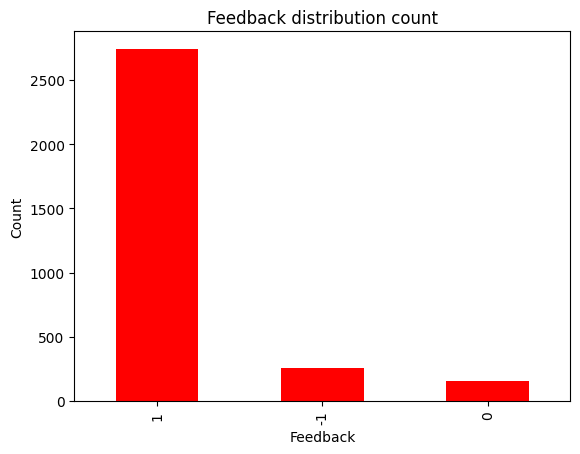

In [54]:
#Bar graph to visualize the total counts of each feedback

data['new_feedback'].value_counts().plot.bar(color = 'red')
plt.title('Feedback distribution count')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.show()


In [55]:
#seperating the data and label

X= data['stemmed_content'].values
Y= data['new_feedback'].values

In [56]:
print(X)


['love echo' 'love'
 'sometim play game answer question correctli alexa say got wrong answer like abl turn light away home'
 ...
 'love thing run entir home tv light thermostat front door dead bolt camera love listen npr thing well worth valu realli shine stat ad smart devic control entir home like right star trek name mine comput get feel amaz devic smart system'
 'complaint sound qualiti great mostli use command though anoth dot hook stereo system play music coupl friend dot mind audio qualiti bother kind thing go full size echo make sure hook larger speaker'
 'good']


In [57]:
print(Y.tolist())


[1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, -1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 

Now we have to split the data into the test data and the training data.

In [58]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.4, stratify= Y, random_state= 2)

In [59]:
print(X.shape, X_train, X_test.shape)

(3149,) ['th amazon echo devic purchas refurbish satisfi time differ tell brand new price cheaper echo wake us keep timer play music us act encyclopedia turn light much'
 'work great'
 'overal great like see lyric time date howev sometim freez respond properli error messag lack connect stop reset resolv problem'
 ... 'love hard time set app'
 'use yet sure great other get amaz echo echo dot greatest technolog ever came'
 'awesom cute smart'] (1260,)


In [60]:
#feature extraction(converting textual data to numerical data)
vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [61]:
print(X_train)

  (0, 1332)	0.1492256541499579
  (0, 1186)	0.14759463594882305
  (0, 2168)	0.15608253404972558
  (0, 678)	0.28807464038827
  (0, 25)	0.2421084270110686
  (0, 1335)	0.10728449895588031
  (0, 1531)	0.12821885554616647
  (0, 2108)	0.18750810023595757
  (0, 1126)	0.1820215016029955
  (0, 2215)	0.40717698455541534
  (0, 2261)	0.1912426974122905
  (0, 354)	0.26264177558888097
  (0, 1574)	0.16852899253910922
  (0, 1367)	0.1492256541499579
  (0, 264)	0.21667556221167955
  (0, 2063)	0.1678300786850981
  (0, 567)	0.17724960939851153
  (0, 2107)	0.13218941410111723
  (0, 1754)	0.23288723120177357
  (0, 1673)	0.18750810023595757
  (0, 1609)	0.14759463594882305
  (0, 560)	0.12683409241649904
  (0, 645)	0.1934578127000899
  (0, 96)	0.13519191032268785
  (0, 2076)	0.25445422187648575
  :	:
  (1884, 1199)	0.19438333451050138
  (1884, 1367)	0.3579446319488103
  (1884, 1673)	0.22488598997506695
  (1884, 645)	0.11601085945813411
  (1886, 123)	0.4885604741220375
  (1886, 945)	0.6407605922944747
  (1886, 1

In [62]:
print(X_test)

  (0, 2040)	0.5208275204760854
  (0, 1924)	0.7281884566275328
  (0, 1375)	0.44551124065408776
  (1, 1918)	0.242020606142899
  (1, 1732)	0.31598167603374405
  (1, 1615)	0.31778353437536133
  (1, 1588)	0.2640809746560456
  (1, 1335)	0.22653571501207534
  (1, 914)	0.5951108812698045
  (1, 779)	0.32957481086239604
  (1, 454)	0.39593121066797266
  (2, 2280)	0.2466058204953113
  (2, 2174)	0.22199622940952746
  (2, 2086)	0.28683774197245376
  (2, 2041)	0.36079901203572723
  (2, 1977)	0.1730291110100237
  (2, 1929)	0.16208470270582961
  (2, 1720)	0.2506044040395341
  (2, 1586)	0.2970922415925526
  (2, 1440)	0.24472985713076761
  (2, 1427)	0.15426753037672342
  (2, 1221)	0.10310154464621293
  (2, 880)	0.23059948357445645
  (2, 877)	0.23484447371919492
  (2, 645)	0.12114809481096436
  :	:
  (1256, 1335)	0.1245035944011209
  (1256, 1142)	0.19640463054050608
  (1256, 1134)	0.3343104412399745
  (1256, 659)	0.3343104412399745
  (1256, 555)	0.29529396643956074
  (1256, 454)	0.21760303385769608
  (125

Now we will train the Machine Learning Model using Logistic Regression.

In [63]:
model= LogisticRegression(max_iter=2000)

In [64]:
model.fit(X_train, Y_train)

LogisticRegression(max_iter=2000)

**Model** **Evaluation**

Accuracy Score

In [65]:
#accuracy score on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy= accuracy_score(Y_train, X_train_prediction)

In [66]:
print('Accuracy score on training data: ', training_data_accuracy)

Accuracy score on training data:  0.8930651138168343


In [67]:
#accuracy score on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy= accuracy_score(Y_test, X_test_prediction)
print(X_test_prediction)

[1 1 1 ... 1 1 1]


In [68]:
print('Accuracy score on testing data: ', test_data_accuracy)

Accuracy score on testing data:  0.8809523809523809


**As we can see that the Accuracy of our model is 88.09%**

Saving the Trained Model into a pickle file

In [69]:
filename = 'amazon_product_trained_model.pkl'
pickle.dump(model, open(filename,'wb'))

**Model Testing**

In [70]:
#loading the saved model
loaded_model = pickle.load(open('/content/amazon_product_trained_model.pkl','rb'))

In [74]:
X_new= X_test[10]
print(Y_test[10])

prediction = model.predict(X_new)
print(prediction)

if (prediction[0]==-1):
  print('Negative review')

if(prediction[0]==0):
  print('Neutral review')

else:
  print('Positive review')


1
[1]
Positive review


In [75]:
X_new= X_test[1000]
print(Y_test[1000])

prediction = model.predict(X_new)
print(prediction)

if (prediction[0]==-1):
  print('Negative review')

if(prediction[0]==0):
  print('Neutral review')

if(prediction[0]==1):
  print('Neutral review')

1
[1]
Neutral review


In [76]:
X_new= X_test[29]
print(Y_test[29])

prediction = model.predict(X_new)
print(prediction)

if (prediction[0]==-1):
  print('Negative review')

if(prediction[0]==0):
  print('Neutral review')

if(prediction[0]==1):
  print('Neutral review')

-1
[-1]
Negative review
